# Proyecto de análisis de datos usando dataset

### Pasos para este estudio
1. Carga de datos
1. Exploración
1. Procesamiento
1. Modelos
1. Evaluación
1. Predicción

# Analisis de datos del titanic

## 1. Carga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#lectura de los datos en python
train=pd.read_csv('./../data/train.csv')
test=pd.read_csv('./../data/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Exploración

In [6]:
# que columnas tiene los datos ?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# que tamaño tiene los datos?
train.shape

(891, 12)

In [8]:
# hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#como se distribuyen las variables numericas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#como se comportan las variables categoricas 
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2.1 Estudio de las variables

In [14]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [15]:
#variable vs sex
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [16]:
grouped_sex.unstack(level=0).plot.bar()
plt.show()

NameError: name 'grouped_sex' is not defined

In [17]:
grouped_sex=train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


Axes(0.125,0.11;0.775x0.77)


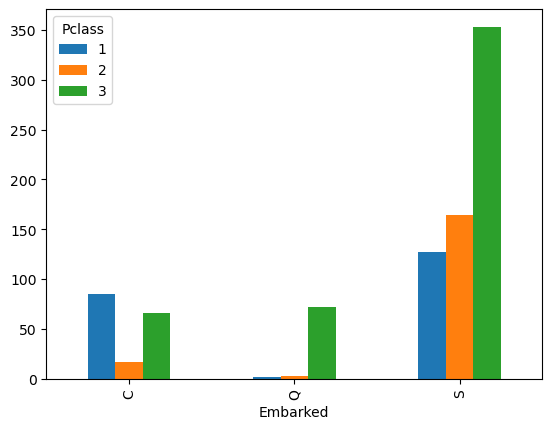

In [18]:
# embarked vs pclass
print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

## 3.-Procesamiento de datos

Empezamos seleccionando las variables que queremos trabajar que serían: 
* Survived
* Sex
* Age
* Pclass

In [19]:
train[['Survived','Sex','Age','Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


Estudiamos las variables nulos

In [20]:
train[['Survived','Sex','Age','Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Tenemos que mejorar

*    Datos faltantes en Age `train['Age'].isna()
*    La variable Sex aparece como object y queremos int o float para algoritmos

In [21]:
#mirar como se distribuye la edad
(train[train['Age'].isna()]
        .groupby(['Sex','Pclass'])
        .count()['PassengerId']
        .unstack(level=0)
)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [22]:
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


De arriba se puede concluir que era gente que viajaba mayormente sola y la mayoría eran de 3era clase.

Esto nos da la idea de que se puede crear una variable que indique si la persona viajaba sola o acompañada.

La crearemos más adelante

In [23]:
# calcular mediana de Age para imputar
train['Age'].median()

28.0

In [24]:
# imputar valor para rellenar nulos
train['Age'].fillna(28.0)
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ya no tenemos nulos. Falta resolver lo de pasar Sex a int

In [96]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

Ahora tenemos la tabla preprocesada lista

In [98]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


## 3.1 Crear nuevas variables

In [99]:
# crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

In [100]:
train.groupby(['Survived','FlagSolo']).count()['PassengerId']


Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


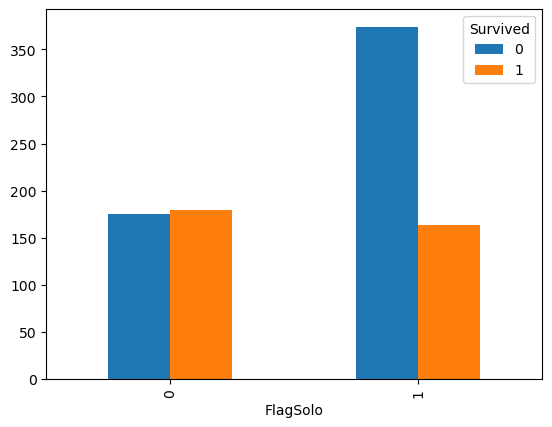

In [101]:
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [102]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Estos ya serían los datos con los que vamos a hacer modelos

In [103]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


## 4. Modelos

Sin entrar en mucho detalle. Vamos a escoger dos modelos de prueba.
* regresión logistica
* arboles de decisión

In [104]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [105]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

Aquí vamos a hacer una matriz de confusión y evaluar que tan bueno es cada modelo

In [69]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

C:\Users\RGARCIA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.79


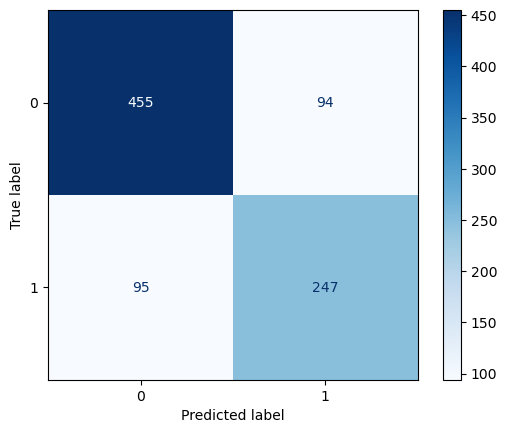

In [106]:
conf_mat_acc(logreg)

C:\Users\RGARCIA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.89


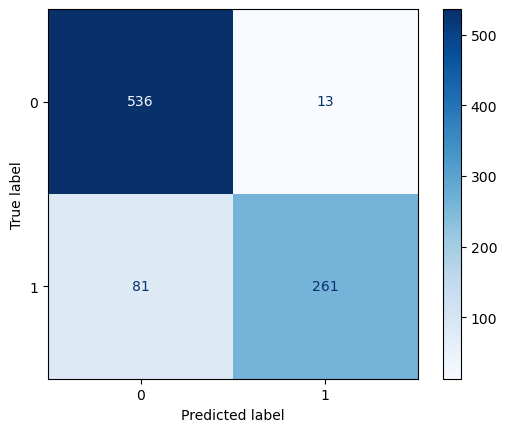

In [107]:
conf_mat_acc(decision_tree)

## 5.1 Evaluación sobre el test set

Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validación los datos que usamos de entrenamiento. Por lo tanto, la estimación del error sería sesgada y tendría poca capacidad de generalización a casos que no haya "visto" el modelo.

In [108]:
# ahora hay que preparar el test set para evaluación
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [109]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [110]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [75]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


Nota: Estas predicciones deberían ser ahora comparadas con el valor real para obtener una mejor estimación del error de predicción sobre el test set y poder escoger un modelo.
